## Aprendizaje de maquina - TP 4 (Crimenes violentos en Estados Unidos)

### Importando bibliotecas

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score

### Funciones auxiliares

In [85]:
def coordinate_plot(data, cluster_var):
    # 1) Agrupo por cluster, x promedio
    x_grp = data.groupby(cluster_var).mean()
    x_grp[cluster_var] = x_grp.index 
    x_grp = x_grp.reset_index(drop=True)
    x_grp # data con las variables originales
    
    # 2) Tengo que hacer minmax de los datos agrupados
    x_grp_no_tgt = x_grp.drop(cluster_var, axis=1)

    mm_scaler = MinMaxScaler()
    mm_scaler.fit(x_grp_no_tgt)
    x_grp_mm = mm_scaler.transform(x_grp_no_tgt)

    # 3) convertir a df
    df_grp_mm = pd.DataFrame(x_grp_mm, columns=x_grp_no_tgt.columns)

    df_grp_mm[cluster_var]=x_grp[cluster_var] # variables escaladas

    # Plot
    parallel_coordinates(df_grp_mm, cluster_var, colormap=plt.get_cmap("Dark2"))
    plt.xticks(rotation=90)

### Carga y analisis de datos

In [2]:
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")

In [3]:
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
violent_crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

Todas las variables son numericas (int en algunos casos y float en otros) excepto 'Unnamed: 0' que es string

Renombro la columna que contiene los nombres de los estados

In [9]:
violent_crime = violent_crime.rename(columns = {'Unnamed: 0': 'State'})

In [10]:
violent_crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
violent_crime.isnull().values.any()

False

El dataframe no contiene nulos

Analisis de los histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc15dee2250>,
      dtype=object)

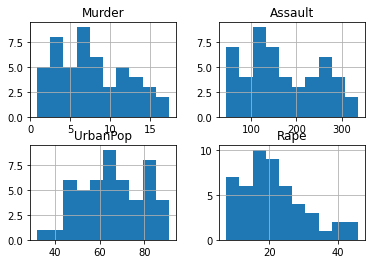

In [23]:
violent_crime.hist()

No se observa una tendencia o outliers

Graficando State vs otras variables

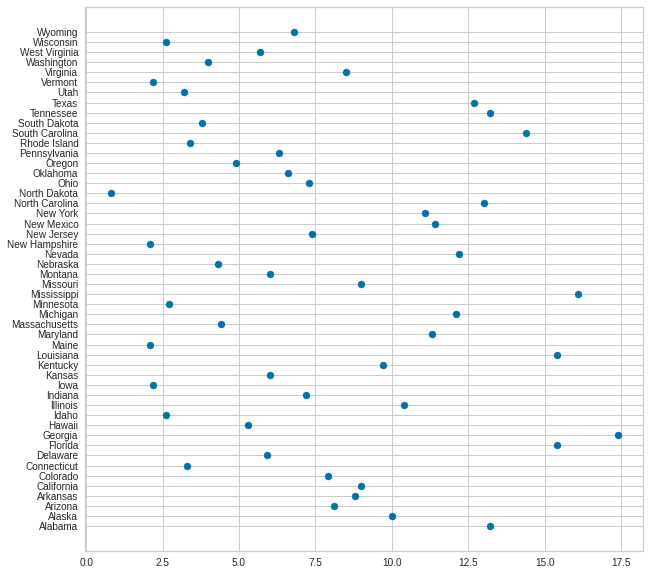

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(violent_crime['Murder'], violent_crime['State'], s=50);

Puede verse que Georgia es el estados que mas asesinatos tiene

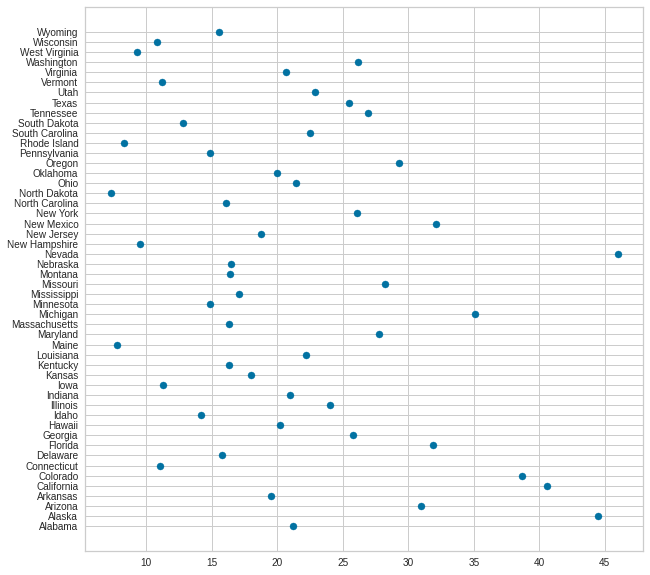

In [50]:
plt.figure(figsize=(10, 10))
plt.scatter(violent_crime['Rape'], violent_crime['State'], s=50);

De aca se observa que Nevada es el estado donde mas violaciones se cometen

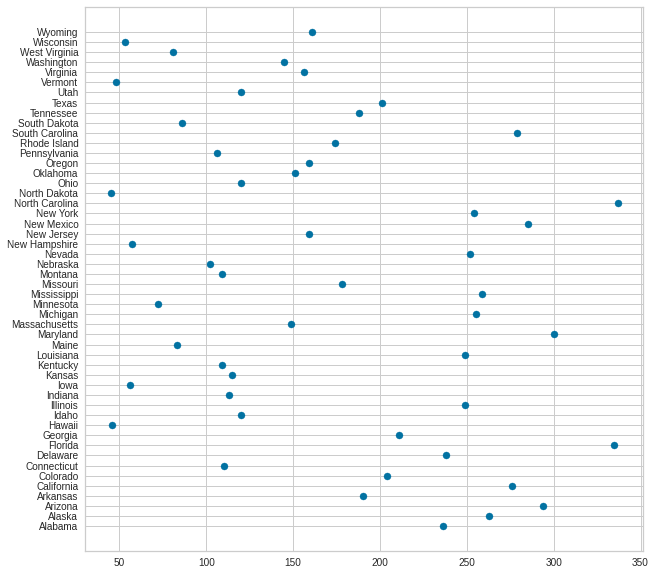

In [51]:
plt.figure(figsize=(10, 10))
plt.scatter(violent_crime['Assault'], violent_crime['State'], s=50);

North Carolina y Ronda son los estados donde mas asaltos se producen

### Preparacion de datos

In [16]:
violent_crime_df = violent_crime.copy()

Drop de la variable categorica

In [18]:
violent_crime_df = violent_crime_df.drop('State', axis = 1)

In [19]:
violent_crime_df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


Normalizando los datos para poder trabajar con el modelo

In [25]:
std_scaler = StandardScaler()
std_scaler.fit(violent_crime_df)
violent_crime_df_norm = std_scaler.transform(violent_crime_df)

### Creacion del modelo

Creando el modelo para 3 clusters

In [72]:
k_means_4 = KMeans(
    n_clusters = 4,  # numero de clusters
    init = 'k-means++',
    random_state = 0
)

Entrenamiento del modelo

In [73]:
k_means_4.fit(violent_crime_df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Prediciendo los clusters

In [74]:
predicted_clusters = k_means_4.predict(violent_crime_df_norm)

In [75]:
predicted_clusters

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 3, 1, 2, 3, 2, 3, 0, 3, 1, 2, 1,
       3, 0, 1, 3, 3, 1, 3, 2, 1, 1, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 1, 2,
       3, 2, 2, 3, 3, 2], dtype=int32)

<h6>Silhouette score</h6>

In [68]:
score = silhouette_score(violent_crime_df_norm, k_means.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouetter Score: 0.340


Con 4 se obtiene el silhouette score mas alto

### Graficos y conclusiones

<h4>Grafico de Silhouettes para distintos numeros de clusters</h4>

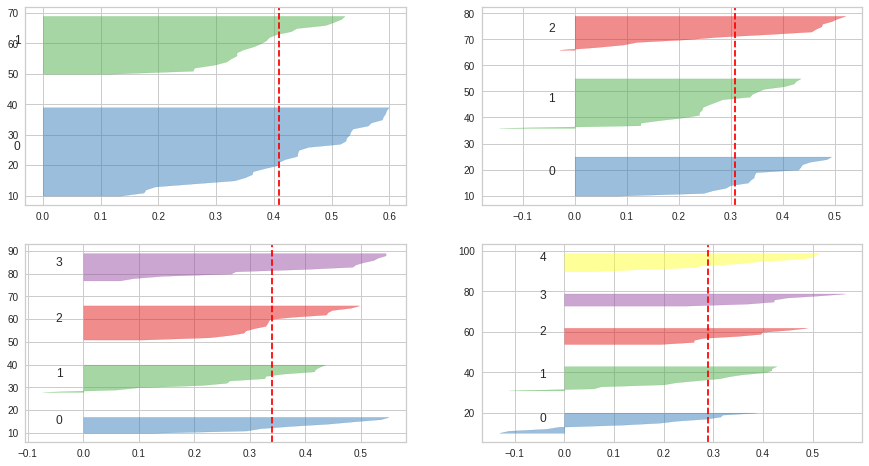

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    # Creando instancias de K-Means con distinto numero de cluster
    k_means = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 0)
    q, mod = divmod(i, 2)
    # Silhouette Visualizer
    visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(violent_crime_df_norm) 

En los 4 casos, el silhouette score es mayor que el silhouette score promedio. Tambien en todos los casos, el grosor de la silhouette es similar entre clusters. Sin embargo, para el caso de 4 clusters, se observa que dos clusters tiene un valor mayor a 0.5, por lo que esta cantidad de clusters es mas optima que en el caso de 5 clusters. Esto coincide con el silhouette scote obtenido antes

<h4> Grafico de coordenadas para sacar conclusiones<h4>

In [95]:
x_data_cluster = violent_crime.copy()
x_data_cluster['cluster'] = predicted_clusters

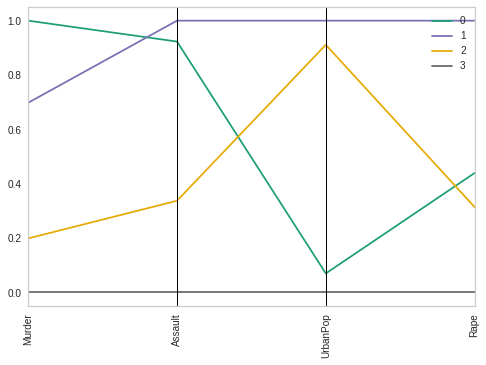

In [96]:
coordinate_plot(x_data_cluster, 'cluster')

In [99]:
x_data_cluster[x_data_cluster['cluster'] == 1]['State'].value_counts()

Missouri      1
Colorado      1
New York      1
Florida       1
Nevada        1
Alaska        1
Arizona       1
New Mexico    1
Illinois      1
California    1
Maryland      1
Texas         1
Michigan      1
Name: State, dtype: int64

De este analisis puede observarse lo siguiente:
<ul>
  <li>Los estados que poseen mayor numero de asaltos tambien poseen el mayor numero de UrbanPop y de violaciones, asi tambien como un alto numero de asesinatos</li>
  <li>Los estados que poseen menor numero de asesinatos poseen tambien un alto numero de UrbanPop</li>
</ul>

Por ende, los estados que se encuentran en el cluster 1 son los que mas crimenes de distintas categorias poseen. Algunos de los estados que caen en este cluster son Colorado, New York, Michigan, Alaska, Arizona, New Mexico y California.